Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
import warnings
from IPython.core.interactiveshell import InteractiveShell

In [2]:
# # Set the ast_node_interactivity property of the InteractiveShell class to "all"
# This makes IPython display the output of all expressions in a cell, not just the last one
InteractiveShell.ast_node_interactivity = "all"

# Use the filterwarnings function from the warnings module to ignore all warnings
# This can help keep the output clean by suppressing non-critical warning messages
warnings.filterwarnings('ignore')

In [3]:
# Read the CSV file named 'heart_statlog_cleveland_hungary_final.csv' into a pandas DataFrame
data = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [4]:
data.head()

,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [5]:
# Display the basic information about the DataFrame
data.info()

# Display the counts of unique values in the 'target' column
data['target'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bps          1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


target
1    629
0    561
Name: count, dtype: int64

EDA

In [6]:
# Print categorical attributes with its value type and its occurence
 
print(data['resting ecg'].value_counts())
print(data['sex'].value_counts())
print(data['chest pain type'].value_counts())
print(data['fasting blood sugar'].value_counts())
print(data['exercise angina'].value_counts())
print(data['ST slope'].value_counts())

resting ecg
0    684
2    325
1    181
Name: count, dtype: int64
sex
1    909
0    281
Name: count, dtype: int64
chest pain type
4    625
3    283
2    216
1     66
Name: count, dtype: int64
fasting blood sugar
0    936
1    254
Name: count, dtype: int64
exercise angina
0    729
1    461
Name: count, dtype: int64
ST slope
2    582
1    526
3     81
0      1
Name: count, dtype: int64


In [7]:
# Outlier Detection and Removal

data = data[data["ST slope"]!=0]
data.drop_duplicates()

,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


Pre - Model Training Steps

In [8]:
# One Hot Encoding

# Converting Categorical features to object type
data['chest pain type'] = data['chest pain type'].astype('object')
data['resting ecg'] = data['resting ecg'].astype('object')
data['ST slope'] = data['ST slope'].astype('object')
data['sex'] = data['sex'].astype('object')
data['fasting blood sugar'] = data['fasting blood sugar'].astype('object')
data['exercise angina'] = data['exercise angina'].astype('object')

cat_col = ['chest pain type', 'resting ecg', 'ST slope', 'sex', 'fasting blood sugar', 'exercise angina']

data_encoded = pd.get_dummies(data,columns=cat_col)

print(data_encoded)

      age  resting bps  cholesterol  max heart rate  oldpeak  target  \
0      40          140          289             172      0.0       0   
1      49          160          180             156      1.0       1   
2      37          130          283              98      0.0       0   
3      48          138          214             108      1.5       1   
4      54          150          195             122      0.0       0   
...   ...          ...          ...             ...      ...     ...   
1185   45          110          264             132      1.2       1   
1186   68          144          193             141      3.4       1   
1187   57          130          131             115      1.2       1   
1188   57          130          236             174      0.0       1   
1189   38          138          175             173      0.0       0   

      chest pain type_1  chest pain type_2  chest pain type_3  \
0                 False               True              False   
1    

In [9]:
numeric_col = ['resting bps', 'cholesterol', 'max heart rate', 'oldpeak', 'age']
scaler = StandardScaler()
data_encoded[numeric_col] = scaler.fit_transform(data_encoded[numeric_col])

In [10]:
# Separating Target and other features from dataset 
y = data_encoded['target']
X = data_encoded.drop('target', axis=1)

In [11]:
# Test and Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Index and its description
# 0 = Model Name Abbreviation
# 1 = Model Name
# 2 = Model Object
# 3 = Train Accuracy
# 4 = Test Accuracy
# 5 = Metrics Information


classifiers = [['LR','Logistic Regression', LogisticRegression(max_iter=1000,random_state=42)],
               ['SV','Support Vector Classifier', SVC(kernel='linear', random_state=42)],
               ['RF','Random Forest Classifier',RandomForestClassifier(n_estimators=70, max_depth=6, min_samples_split=22, max_features=3, random_state=42)],
               ['KNN','K-Nearest Neighbour Classifier', KNeighborsClassifier(n_neighbors=3)],
               ['DT','Decision Tree Classifier', DecisionTreeClassifier(max_features=8, min_samples_leaf=7, min_samples_split=46, min_impurity_decrease=0.0001, random_state=42)],
               ['GB','Gradient Boosting Classifier', GradientBoostingClassifier(random_state=42, n_estimators=25, learning_rate=0.1)],
               ['VC','Voting Classifier', VotingClassifier(estimators=[ ('Gradient Boost', GradientBoostingClassifier(random_state=42, n_estimators=25, learning_rate=0.1)), 
                                                                   ('Random Forest Classifier', RandomForestClassifier(n_estimators=70, max_depth=6, min_samples_split=22, random_state=42, max_features=3))], 
                                                      voting='soft',
                                                      )  ]
               ]

for classifier in classifiers:
    model = classifier[2]
    print(model)
    model.fit(X_train, y_train)
    y_train_predicted = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_predicted)
    print(f'Train accuracy of {classifier[1]} is {train_accuracy}')
    
    y_test_predicted = model.predict(X_test)
    
    test_accuracy = accuracy_score(y_test, y_test_predicted)
    test_precision = precision_score(y_test, y_test_predicted)
    test_recall = recall_score(y_test, y_test_predicted)
    test_f1 = f1_score(y_test, y_test_predicted)

    test_accuracy_pos0 = accuracy_score(y_test, y_test_predicted)
    test_precision_pos0 = precision_score(y_test, y_test_predicted, pos_label=0)
    test_recall_pos0 = recall_score(y_test, y_test_predicted, pos_label=0)
    test_f1_pos0 = f1_score(y_test, y_test_predicted, pos_label=0)


    print(f'Test accuracy of {classifier[1]} is {test_accuracy}\n \n')
    
    cr = classification_report(y_test_predicted, y_test)
    print(cr)
    classifier.append(train_accuracy)
    classifier.append(test_accuracy)
    classifier.append({'1':{'Accuracy_1':test_accuracy, 'Precision_1':test_precision, 'Recall_1':test_recall, 'F1_1':test_f1}, 
                       '0':{'Accuracy_0':test_accuracy, 'Precision_0':test_precision_pos0, 'Recall_0':test_recall_pos0, 'F1_0':test_f1_pos0}
                       })



LogisticRegression(max_iter=1000, random_state=42)


LogisticRegression(max_iter=1000, random_state=42)

Train accuracy of Logistic Regression is 0.8443743427970557
Test accuracy of Logistic Regression is 0.8613445378151261
 

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       106
           1       0.87      0.88      0.88       132

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238

SVC(kernel='linear', random_state=42)


SVC(kernel='linear', random_state=42)

Train accuracy of Support Vector Classifier is 0.8517350157728707
Test accuracy of Support Vector Classifier is 0.8739495798319328
 

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       107
           1       0.88      0.89      0.89       131

    accuracy                           0.87       238
   macro avg       0.87      0.87      0.87       238
weighted avg       0.87      0.87      0.87       238

RandomForestClassifier(max_depth=6, max_features=3, min_samples_split=22,
                       n_estimators=70, random_state=42)


RandomForestClassifier(max_depth=6, max_features=3, min_samples_split=22,
                       n_estimators=70, random_state=42)

Train accuracy of Random Forest Classifier is 0.8916929547844374
Test accuracy of Random Forest Classifier is 0.8949579831932774
 

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       104
           1       0.91      0.90      0.91       134

    accuracy                           0.89       238
   macro avg       0.89      0.89      0.89       238
weighted avg       0.90      0.89      0.90       238

KNeighborsClassifier(n_neighbors=3)


KNeighborsClassifier(n_neighbors=3)

Train accuracy of K-Nearest Neighbour Classifier is 0.92534174553102
Test accuracy of K-Nearest Neighbour Classifier is 0.8445378151260504
 

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       104
           1       0.86      0.86      0.86       134

    accuracy                           0.84       238
   macro avg       0.84      0.84      0.84       238
weighted avg       0.84      0.84      0.84       238

DecisionTreeClassifier(max_features=8, min_impurity_decrease=0.0001,
                       min_samples_leaf=7, min_samples_split=46,
                       random_state=42)


DecisionTreeClassifier(max_features=8, min_impurity_decrease=0.0001,
                       min_samples_leaf=7, min_samples_split=46,
                       random_state=42)

Train accuracy of Decision Tree Classifier is 0.8696109358569927
Test accuracy of Decision Tree Classifier is 0.8151260504201681
 

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       109
           1       0.82      0.84      0.83       129

    accuracy                           0.82       238
   macro avg       0.81      0.81      0.81       238
weighted avg       0.81      0.82      0.81       238

GradientBoostingClassifier(n_estimators=25, random_state=42)


GradientBoostingClassifier(n_estimators=25, random_state=42)

Train accuracy of Gradient Boosting Classifier is 0.8853838065194533
Test accuracy of Gradient Boosting Classifier is 0.8907563025210085
 

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       101
           1       0.92      0.89      0.90       137

    accuracy                           0.89       238
   macro avg       0.89      0.89      0.89       238
weighted avg       0.89      0.89      0.89       238

VotingClassifier(estimators=[('Gradient Boost',
                              GradientBoostingClassifier(n_estimators=25,
                                                         random_state=42)),
                             ('Random Forest Classifier',
                              RandomForestClassifier(max_depth=6,
                                                     max_features=3,
                                                     min_samples_split=22,
                                                     n_estimators=7

VotingClassifier(estimators=[('Gradient Boost',
                              GradientBoostingClassifier(n_estimators=25,
                                                         random_state=42)),
                             ('Random Forest Classifier',
                              RandomForestClassifier(max_depth=6,
                                                     max_features=3,
                                                     min_samples_split=22,
                                                     n_estimators=70,
                                                     random_state=42))],
                 voting='soft')

Train accuracy of Voting Classifier is 0.8980021030494216
Test accuracy of Voting Classifier is 0.8949579831932774
 

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       102
           1       0.92      0.90      0.91       136

    accuracy                           0.89       238
   macro avg       0.89      0.89      0.89       238
weighted avg       0.90      0.89      0.90       238



<BarContainer object of 7 artists>

Text(81.5126050420168, 0, '81.51')

Text(84.45378151260505, 1, '84.45')

Text(86.1344537815126, 2, '86.13')

Text(87.39495798319328, 3, '87.39')

Text(89.07563025210085, 4, '89.08')

Text(89.49579831932773, 5, '89.5')

Text(89.49579831932773, 6, '89.5')

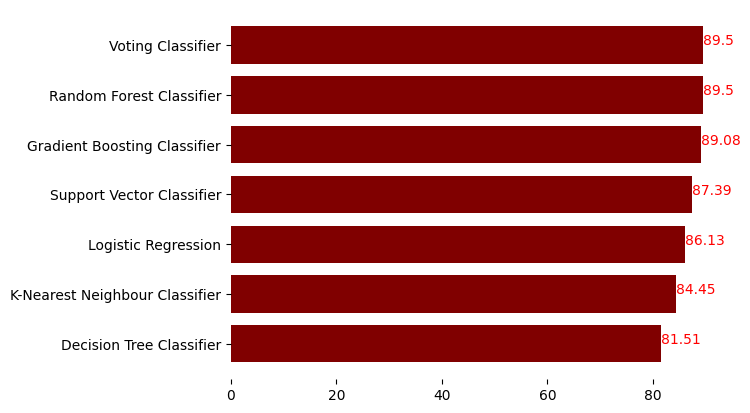

In [21]:
classifiers = sorted(classifiers, key=lambda a: a[4])
fig, ax=plt.subplots()
xaxis_name = [x[1] for x in classifiers]
values = [x[4]*100 for x in classifiers]

ax.barh(xaxis_name, values, 0.75,color='maroon')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

for i, v in enumerate(values):
    ax.text(v,i, str(round(v, 2)), 
            color = 'red')
    
plt.show()

<BarContainer object of 7 artists>

Text(-0.3, 0.7898165137614679, '0.78')

Text(0.7, 0.8369230769230769, '0.827')

Text(1.7, 0.849622641509434, '0.84')

Text(2.7, 0.8604672897196262, '0.85')

Text(3.7, 0.9010891089108911, '0.891')

Text(4.7, 0.8946153846153846, '0.885')

Text(5.7, 0.9021568627450981, '0.892')

Text(0.5, 0, 'Model Name')

Text(0, 0.5, 'Precision')

Text(0.5, 1.0, 'Precision - Class 0 (Not Having Heart Disease)')

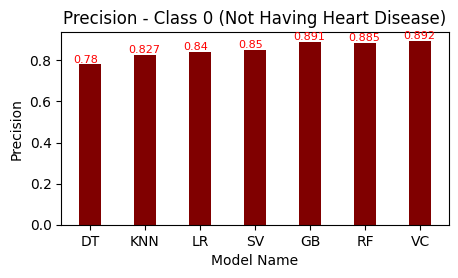

In [22]:
# Precision Graph
# Class 0 and 1 
  

model_name = [ classifier[0] for classifier in classifiers ]
values = [ classifier[5]['0']['Precision_0'] for classifier in classifiers ]
  
fig = plt.figure(figsize = (5, 2.5))
 
# creating the bar plot
plt.bar(model_name, values, color ='maroon', 
        width = 0.4)


for i, v in enumerate(values):
        plt.text(i-0.3, v+0.01, str(round(v, 3)), color='red', fontsize=8)
    
plt.xlabel("Model Name")
plt.ylabel("Precision")
plt.title("Precision - Class 0 (Not Having Heart Disease)")

plt.show()

<BarContainer object of 7 artists>

Text(-0.3, 0.8887878787878788, '0.879')

Text(0.7, 0.9031297709923665, '0.893')

Text(1.7, 0.8549612403100775, '0.845')

Text(2.7, 0.9005109489051095, '0.891')

Text(3.7, 0.9129850746268657, '0.903')

Text(4.7, 0.9070588235294118, '0.897')

Text(5.7, 0.8682089552238806, '0.858')

Text(0.5, 0, 'Model Name')

Text(0, 0.5, 'Precision')

Text(0.5, 1.0, 'Precision - Class 1 (Having Heart Disease)')

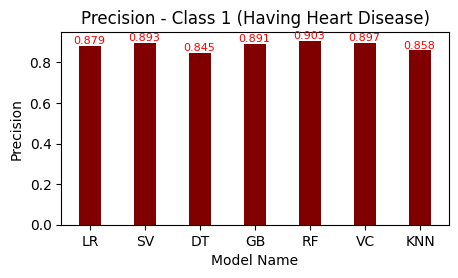

In [15]:
model_name = [ classifier[0] for classifier in classifiers ]
values = [ classifier[5]['1']['Precision_1'] for classifier in classifiers ]
fig = plt.figure(figsize = (5, 2.5))
 
# creating the bar plot
plt.bar(model_name, values, color ='maroon', 
        width = 0.4)


for i, v in enumerate(values):
        plt.text(i-0.3, v+0.01, str(round(v, 3)), color='red', fontsize=8)  
    

plt.xlabel("Model Name")
plt.ylabel("Precision")
plt.title("Precision - Class 1 (Having Heart Disease)")
plt.show()

<BarContainer object of 7 artists>

Text(-0.3, 0.8576190476190476, '0.848')

Text(0.7, 0.8766666666666667, '0.867')

Text(1.7, 0.8195238095238095, '0.81')

Text(2.7, 0.8671428571428571, '0.857')

Text(3.7, 0.8861904761904762, '0.876')

Text(4.7, 0.8766666666666667, '0.867')

Text(5.7, 0.829047619047619, '0.819')

Text(0.5, 0, 'Model Name')

Text(0, 0.5, 'Recall')

Text(0.5, 1.0, 'Recall Score - Class 0 (Not Having Heart Disease)')

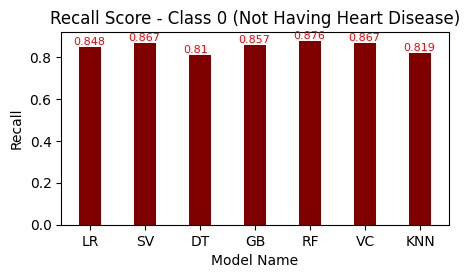

In [16]:
model_name = [ classifier[0] for classifier in classifiers ]
values = [ classifier[5]['0']['Recall_0'] for classifier in classifiers ]
fig = plt.figure(figsize = (5, 2.5))
 
# creating the bar plot
plt.bar(model_name, values, color ='maroon', 
        width = 0.4)

for i, v in enumerate(values):
        plt.text(i-0.3, v+0.01, str(round(v, 3)), color='red', fontsize=8)

plt.xlabel("Model Name")
plt.ylabel("Recall")
plt.title("Recall Score - Class 0 (Not Having Heart Disease)")
plt.show()

<BarContainer object of 7 artists>

Text(-0.3, 0.8821804511278195, '0.872')

Text(0.7, 0.8896992481203008, '0.88')

Text(1.7, 0.8295488721804511, '0.82')

Text(2.7, 0.9272932330827067, '0.917')

Text(3.7, 0.9197744360902256, '0.91')

Text(4.7, 0.9272932330827067, '0.917')

Text(5.7, 0.8746616541353384, '0.865')

Text(0.5, 0, 'Model Name')

Text(0, 0.5, 'Recall')

Text(0.5, 1.0, 'Recall - Class 1 (Having Heart Disease)')

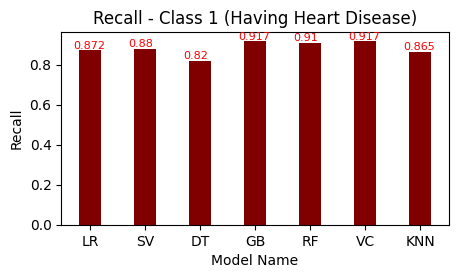

In [17]:
model_name = [ classifier[0] for classifier in classifiers ]
values = [ classifier[5]['1']['Recall_1'] for classifier in classifiers ]
fig = plt.figure(figsize = (5, 2.5))
 
# creating the bar plot
plt.bar(model_name, values, color ='maroon', 
        width = 0.4)
 
for i, v in enumerate(values):
        plt.text(i-0.3, v+0.01, str(round(v, 3)), color='red', fontsize=8)

plt.xlabel("Model Name")
plt.ylabel("Recall")
plt.title("Recall - Class 1 (Having Heart Disease)")
plt.show()


<BarContainer object of 7 artists>

Text(-0.3, 0.8536018957345972, '0.844')

Text(0.7, 0.8684905660377359, '0.858')

Text(1.7, 0.804392523364486, '0.794')

Text(2.7, 0.8837864077669902, '0.874')

Text(3.7, 0.8903827751196173, '0.88')

Text(4.7, 0.8892270531400966, '0.879')

Text(5.7, 0.8329665071770335, '0.823')

Text(0.5, 0, 'Model Name')

Text(0, 0.5, 'F1-Score')

Text(0.5, 1.0, 'F1-Score - Class 0 (Not Having Heart Disease)')

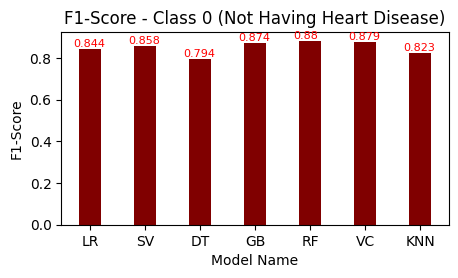

In [18]:
model_name = [ classifier[0] for classifier in classifiers ]
values = [ classifier[5]['0']['F1_0'] for classifier in classifiers ]
fig = plt.figure(figsize = (5, 2.5))
 
# creating the bar plot
plt.bar(model_name, values, color ='maroon', 
        width = 0.4)

for i, v in enumerate(values):
        plt.text(i-0.3, v+0.01, str(round(v, 3)), color='red', fontsize=8)
    
    
plt.xlabel("Model Name")
plt.ylabel("F1-Score")
plt.title("F1-Score - Class 0 (Not Having Heart Disease)")
plt.show()


<BarContainer object of 7 artists>

Text(-0.3, 0.8854716981132076, '0.875')

Text(0.7, 0.8963636363636364, '0.886')

Text(1.7, 0.8420610687022901, '0.832')

Text(2.7, 0.9137037037037037, '0.904')

Text(3.7, 0.9163670411985019, '0.906')

Text(4.7, 0.9170631970260223, '0.907')

Text(5.7, 0.8714232209737828, '0.861')

Text(0.5, 0, 'Model Name')

Text(0, 0.5, 'F1-Score')

Text(0.5, 1.0, 'F1-Score - Class 1 (Having Heart Disease)')

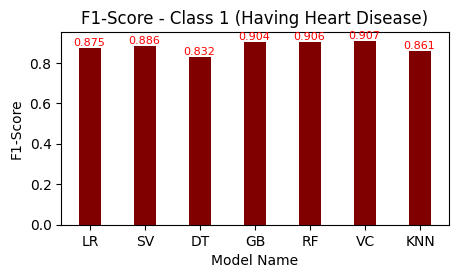

In [19]:
model_name = [ classifier[0] for classifier in classifiers ]
values = [ classifier[5]['1']['F1_1'] for classifier in classifiers ]
fig = plt.figure(figsize = (5, 2.5))
 
# creating the bar plot
plt.bar(model_name, values, color ='maroon', 
        width = 0.4)

for i, v in enumerate(values):
        plt.text(i-0.3, v+0.01, str(round(v, 3)), color='red', fontsize=8)
    
plt.xlabel("Model Name")
plt.ylabel("F1-Score")
plt.title("F1-Score - Class 1 (Having Heart Disease)")
plt.show()
